In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.metrics import accuracy_score

In [122]:
abalone = pd.read_csv(
    "/home/alastair_oberon/Shenanigans/Coding_shenanigans/Juplab_env/TM_AI_Env/Test_CSV/abalone.data.csv"
)
abalone

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [125]:
abalone = abalone[abalone['gender'].isin(['M', 'F'])]
abalone

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [126]:
abalone.isna()

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [127]:
abl_gen = LabelEncoder()

In [128]:
abalone["gender"] = abl_gen.fit_transform(abalone["gender"])
abalone

,gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [129]:
X = abalone.drop(["Rings"], axis = 1)
y = abalone["Rings"]

In [130]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=5)

In [131]:
model = RandomForestClassifier(n_estimators=200)
model.fit(Xtrain,ytrain)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
print(model.score(Xtrain, ytrain) * 100)
print(model.score(Xtest, ytest) * 100)


100.0
22.39858906525573


In [133]:
ypred = model.predict(Xtest)
print(ypred)

[10  7 11 10 10  8 11 14 10 11  8  8 11  7  9 10 10  8 15 11  8 11 14 11
 11 10 10 10 17  9  6 10  9  9 11 12  8 12 11  8 11  9  9  9  8  7 10 10
 15  8 13 10  9 17 11  9 10 11 10  8  9  7 10 10  8 11 11 12 11  9  8 11
 11 11  9 10  9  9 12 13 11  8 11 12  8 16  8 16 11 12  8 10 11 11  7 11
 10 12  8 13 11  8 11 10 12  9  9  9 11 10 16 11  6  9  8 10  9  9  9 10
  9 18 10 13 10 11  5 10  7 14  9 16 11 10 10  9 17 17 11  9  9 12 14  9
  9 11  9 11 10 11 10  9 11  9 10 10 10  9 10  9 10 10  9 10 10 10 11 11
 12  9 10 11  8 10 10 13 10 12 20 12  9  8  8 11 10 11 13 10 13 10  9 11
  8 11 10 11  9 11 12  8  8 11 13  8 10 10 14  8  9 11  8  8  9 10  9  8
 11  8 13  9 11 12 12  4 12  8 12  9  7  9  9  4 10 10 10 19  9 10 10  8
 11 16 10 10  9 12  6 11 10  8  8  8  9  9 10 11  8  9 10 11  9  9 13  8
  9 11 11 14 10 10 18 11 12 11 10 11  9  8  9 12 12 11  9  9  5  9  8 10
 11 13 12 10  9  9  9 11 11  8 10  9 12  9 10 11 11  9 11 10  9  9  8  9
 10  9 14 10 11  7 11  9 10  9  7  9 11 12 10 10 10

In [134]:
print("Accuracy Score is: ", accuracy_score(ypred,ytest))


Accuracy Score is:  0.2239858906525573


In [135]:
cm = confusion_matrix(ytest,ypred)
print(cm)

[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  1  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  6  6  5  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1 18 17 10  7  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 17 37 25 15  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 15 23 30 27  3  2  2  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 13 27 27 10  3  1  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 15 18  4  4  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  1  2  3 10 11  5  3  3  0  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  4  3  7  5  4  3  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  2  6  1  3  0  1  3  1  0  1  1  0  0]
 [ 0  0  0  0  0  0  2  5  2  1  0  2  0  0  1  1  0  1  0  0]
 [ 0  0  0  0  0  0  4  0  2  3  1  1  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0

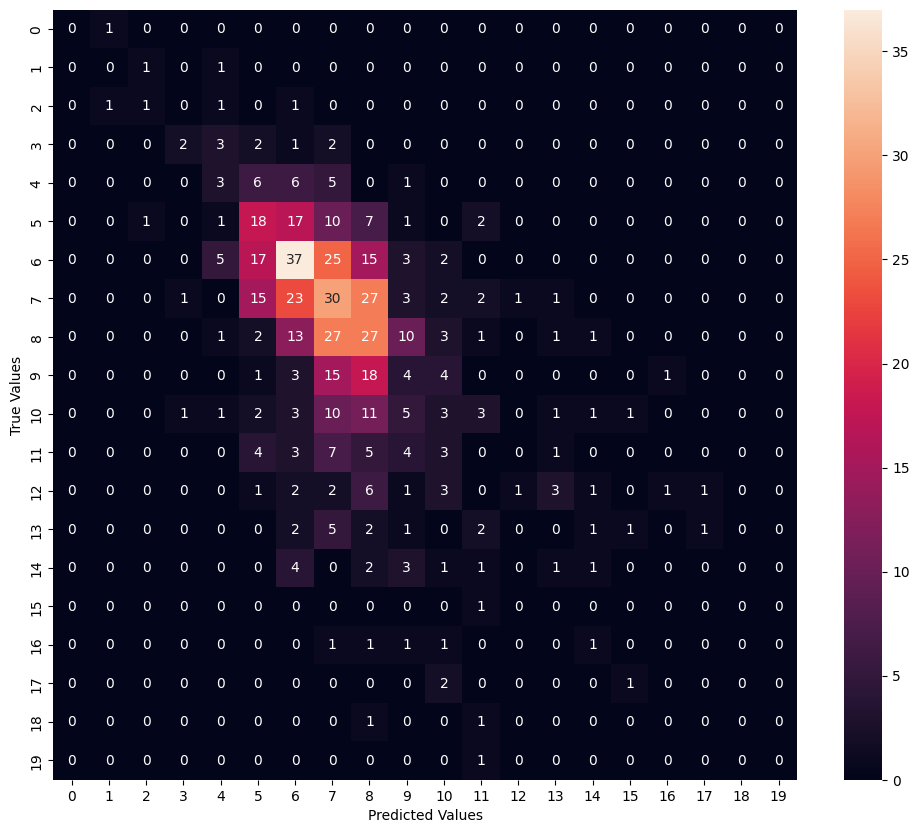

In [136]:
plt.figure(figsize=(12,10))

sns.heatmap(cm, annot = True)

plt.xlabel("Predicted Values")
plt.ylabel("True Values")

plt.show()